In [7]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import relativedelta
import re
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Clean and preprocess datasets





## Load datasets

In [8]:
campaign_data = pd.read_csv("synthetic_campaign.csv")
mortgage_data = pd.read_csv("synthetic_mortgage.csv")


campaign_data

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_nw,view_nw,interested_insurance,company_email,created_account
0,8997001834838,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2764968366919,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No
2,8454884369838,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No
3,5781315494498,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No
4,8687486791428,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32055,9368442485238,NaN,Trevor,Rowe,34,EH11 9AD,Never-married,HS-grad,"Designer, ceramics/pottery",4,12,7,4,1,jemma98@kennedy-bell.com,NaN
32056,4452981921878,Mrs.,Benjamin,Williams,53,EH73 3RY,Divorced,12th,Best boy,3,10,8,7,1,williamsbenjamin@ward.net,NaN
32057,1017390634660,Mr.,Frank,Saunders,44,SN94 0DX,Married-civ-spouse,Bachelors,Environmental health practitioner,6,17,3,4,1,glenn44@wyatt-ryan.com,NaN
32058,1089440229690,NaN,Raymond,Dunn,60,EH95 7NN,Widowed,Some-college,Event organiser,6,13,6,2,1,oliver79@young.info,NaN


In [9]:
mortgage_data

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Miss Tom Williams,1991-05-13,Swindon,NW384000,£19073 yearly,0,9,38,0,0,Yes,Female,Christianity,Wife,White,United Kingdom,Private,257302
32557,Dr. Barry Sean Moore,1977-10-16,Edinburgh,42839712,266309946.37SOS,17,2,40,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Private,154374
32558,Cameron Alexander,1959-04-30,Edinburgh,27584132,£1752.24 per month,21,3,40,0,0,Yes,Female,Christianity,Unmarried,White,United Kingdom,Private,151910
32559,Mr. Peter Mann,1996-12-09,Edinburgh,29357307,£24848 yearly,2,9,20,0,0,Yes,Male,Christianity,Own-child,White,United Kingdom,Private,201490


## Join table to make one dataset

#### Perform data wrangling on name field for both tables because I'll be using the first and last name to join both tables

In [10]:

# helper function to dynamically select first and last name and place in one column
def fsname(df, column_name):
    fullname = []
    titles = ['Mr', 'Mrs', 'Miss', 'Ms', 'Mx', 'Sir', 'Dr', 'Cllr', 'Lady' , 'Lord', '.'] # ideally find all posible titles
    for x in df[column_name].values:
        #if '.' in x: 
        if any(i in x for i in titles):
            x = x.split(' ', 1)[1] #split title from names and select names 
        if len(x.split()) > 2: # has middle name
            x = x.split()
            x.pop(1)
            x = ' '.join(x) # make full name from ls
        fullname.append(x)
    df[column_name] = fullname

            
# mortgage table function call
fsname(mortgage_data, 'full_name') # when time permits- check len of each column value is 2





# campaign table function call
campaign_data[['name_title', 'first_name', 'last_name']] = campaign_data[['name_title', 'first_name', 'last_name']].fillna('')# fill null cells with space
campaign_data['full_name'] = campaign_data['name_title'] +' '+ campaign_data['first_name'] +' '+ campaign_data['last_name']

fsname(campaign_data, 'full_name')

print(campaign_data['full_name'].head())
print(mortgage_data['full_name'].head())


0          Dale Coles
1          Joel Allen
2         Craig Davis
3    Brandon Thornton
4      Brett Fletcher
Name: full_name, dtype: object
0          Dale Coles
1          Joel Allen
2         Craig Davis
3    Brandon Thornton
4      Brett Fletcher
Name: full_name, dtype: object


#### Left join on mortgage table using full name and age as key

In [11]:
# convert dob to age to help join table e.g using full name only doesn't work for husband and wife with the same surname
mortgage_data['dob'] = pd.DatetimeIndex(mortgage_data['dob'])
mortgage_data['dob']

datetime_object = datetime.strptime('02/20/18', '%m/%d/%y')
mortgage_data['age'] = (datetime_object - mortgage_data['dob']) / np.timedelta64(1, 'Y')
mortgage_data['age'] = mortgage_data['age'].round(0)
mortgage_data['age'] = mortgage_data['age'].astype(int)
mortgage_data['age']


data = pd.merge(mortgage_data, campaign_data, on=['full_name', 'age'], how='inner')
data

# row count of mortgage and data aren't the same, indicates more duplication. This could mean full name and age is not
# enough to unqiuely identify each person

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,...,marital_status,education,job_title,occupation_level,education_num,familiarity_nw,view_nw,interested_insurance,company_email,created_account
0,Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,...,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,Brett Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,...,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No
2,Hugh Armstrong,1987-03-02,Swindon,NW384000,£3312.78 per month,4,4,50,14084,0,...,Never-married,Masters,Insurance broker,12,18,6,3,1,lydiataylor@wallace.com,Yes
3,Mathew Fox,1976-03-20,South Caroline,72232552,£16785 yearly,0,1,40,5178,0,...,Married-civ-spouse,Bachelors,"Development worker, international aid",4,17,5,3,1,kim75@evans-scott.org,Yes
4,Barry Brown,1977-12-11,Swindon,38670664,£29649 yearly,3,10,40,0,0,...,Married-civ-spouse,Assoc-voc,Cartographer,10,14,8,5,0,ronaldkhan@martin-scott.com,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Connor Russell,1996-04-25,Edinburgh,00811729,£1475.06 per month,1,5,30,1055,0,...,Never-married,Bachelors,"Journalist, broadcasting",7,17,3,6,0,teresa83@poole.com,NaN
10320,Malcolm Holland,1995-06-22,Edinburgh,29849857,£18396 - 33343 range,2,1,50,0,0,...,Never-married,Bachelors,Adult nurse,8,17,9,5,0,jayneali@owens.com,NaN
10321,Frank Saunders,1974-04-27,Swindon,NW384000,£23733 yearly,13,7,45,0,0,...,Married-civ-spouse,Bachelors,Environmental health practitioner,6,17,3,4,1,glenn44@wyatt-ryan.com,NaN
10322,Aaron Edwards,1962-08-25,Swindon,71540788,£22185 yearly,20,7,38,0,0,...,Married-civ-spouse,Some-college,Microbiologist,8,13,7,5,1,jacob22@ingram.com,NaN


## More Preprocessing 

#### Remove repeated and high level irrelvant columns 

In [12]:
data = data.drop(columns =['dob', 'participant_id', 'name_title', 'first_name', 'last_name'])

# I'll leave religon/sex/etc in but if we were predictng wether to approve loans it will not be ethical to use religion. Introduces 
# distcrimination within algorithm but this might not be relevant with the specific task
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10324 entries, 0 to 10323
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   full_name                   10324 non-null  object
 1   town                        10324 non-null  object
 2   paye                        10324 non-null  object
 3   salary_band                 10324 non-null  object
 4   years_with_employer         10324 non-null  int64 
 5   months_with_employer        10324 non-null  int64 
 6   hours_per_week              10324 non-null  int64 
 7   capital_gain                10324 non-null  int64 
 8   capital_loss                10324 non-null  int64 
 9   new_mortgage                10324 non-null  object
 10  sex                         10324 non-null  object
 11  religion                    10324 non-null  object
 12  relationship                10324 non-null  object
 13  race                        10324 non-null  ob

#### Handling missing values

In [13]:
col = data.columns
col = col[0:27]
data = data.dropna(subset=col)
data

,full_name,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,...,marital_status,education,job_title,occupation_level,education_num,familiarity_nw,view_nw,interested_insurance,company_email,created_account
0,Dale Coles,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,...,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,Brett Fletcher,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,...,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No
2,Hugh Armstrong,Swindon,NW384000,£3312.78 per month,4,4,50,14084,0,Yes,...,Never-married,Masters,Insurance broker,12,18,6,3,1,lydiataylor@wallace.com,Yes
3,Mathew Fox,South Caroline,72232552,£16785 yearly,0,1,40,5178,0,Yes,...,Married-civ-spouse,Bachelors,"Development worker, international aid",4,17,5,3,1,kim75@evans-scott.org,Yes
4,Barry Brown,Swindon,38670664,£29649 yearly,3,10,40,0,0,Yes,...,Married-civ-spouse,Assoc-voc,Cartographer,10,14,8,5,0,ronaldkhan@martin-scott.com,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Connor Russell,Edinburgh,00811729,£1475.06 per month,1,5,30,1055,0,Yes,...,Never-married,Bachelors,"Journalist, broadcasting",7,17,3,6,0,teresa83@poole.com,NaN
10320,Malcolm Holland,Edinburgh,29849857,£18396 - 33343 range,2,1,50,0,0,Yes,...,Never-married,Bachelors,Adult nurse,8,17,9,5,0,jayneali@owens.com,NaN
10321,Frank Saunders,Swindon,NW384000,£23733 yearly,13,7,45,0,0,Yes,...,Married-civ-spouse,Bachelors,Environmental health practitioner,6,17,3,4,1,glenn44@wyatt-ryan.com,NaN
10322,Aaron Edwards,Swindon,71540788,£22185 yearly,20,7,38,0,0,Yes,...,Married-civ-spouse,Some-college,Microbiologist,8,13,7,5,1,jacob22@ingram.com,NaN


#### Handling different units  

In [14]:
# sort out salary band column


# to solve the other currency problem: ideally I would find/create a dictionary
# that has other currencies as key and the exchange rate to pounds as values. 

def sb(df, column_name):
    salary= []
    for x in df[column_name].values:
        if 'yearly' in x:
            x = map(int, re.findall('\d+', x))
            x = list(x)
            x = abs(x[0])
        elif 'month' in x:
            x = map(int, re.findall('\d+', x))
            x = list(x)
            x = abs(x[0]*12)
        elif 'pw' in x:
            x = map(int, re.findall('\d+', x))
            x = list(x)
            x = abs(x[0]*52)
        elif 'range' in x:
            x = map(int, re.findall('\d+', x))
            x = list(x)
            if len(x) == 2:
                x = abs((x[0] - x[1]) / 2)
            else:
                x = abs(x[0])      
        else:
            x = np.nan # here is were I convert currencies 
        
        salary.append(x)
    df[column_name] = salary
        
            
sb(data, 'salary_band')

data = data.dropna(subset=col)
data = data.fillna('No') # fill nan created account with No


data    
    

,full_name,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,...,marital_status,education,job_title,occupation_level,education_num,familiarity_nw,view_nw,interested_insurance,company_email,created_account
0,Dale Coles,Edinburgh,53791313,18109.0,20,6,40,2174,0,Yes,...,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,Brett Fletcher,Swindon,BR442000,32892.0,3,6,40,0,0,Yes,...,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No
2,Hugh Armstrong,Swindon,NW384000,39744.0,4,4,50,14084,0,Yes,...,Never-married,Masters,Insurance broker,12,18,6,3,1,lydiataylor@wallace.com,Yes
3,Mathew Fox,South Caroline,72232552,16785.0,0,1,40,5178,0,Yes,...,Married-civ-spouse,Bachelors,"Development worker, international aid",4,17,5,3,1,kim75@evans-scott.org,Yes
4,Barry Brown,Swindon,38670664,29649.0,3,10,40,0,0,Yes,...,Married-civ-spouse,Assoc-voc,Cartographer,10,14,8,5,0,ronaldkhan@martin-scott.com,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Connor Russell,Edinburgh,00811729,17700.0,1,5,30,1055,0,Yes,...,Never-married,Bachelors,"Journalist, broadcasting",7,17,3,6,0,teresa83@poole.com,No
10320,Malcolm Holland,Edinburgh,29849857,7473.5,2,1,50,0,0,Yes,...,Never-married,Bachelors,Adult nurse,8,17,9,5,0,jayneali@owens.com,No
10321,Frank Saunders,Swindon,NW384000,23733.0,13,7,45,0,0,Yes,...,Married-civ-spouse,Bachelors,Environmental health practitioner,6,17,3,4,1,glenn44@wyatt-ryan.com,No
10322,Aaron Edwards,Swindon,71540788,22185.0,20,7,38,0,0,Yes,...,Married-civ-spouse,Some-college,Microbiologist,8,13,7,5,1,jacob22@ingram.com,No



##### Join year and month together

In [15]:
data['years_with_employer'] = data['years_with_employer'] + (data['months_with_employer']/12)
data

,full_name,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,...,marital_status,education,job_title,occupation_level,education_num,familiarity_nw,view_nw,interested_insurance,company_email,created_account
0,Dale Coles,Edinburgh,53791313,18109.0,20.500000,6,40,2174,0,Yes,...,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,Brett Fletcher,Swindon,BR442000,32892.0,3.500000,6,40,0,0,Yes,...,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No
2,Hugh Armstrong,Swindon,NW384000,39744.0,4.333333,4,50,14084,0,Yes,...,Never-married,Masters,Insurance broker,12,18,6,3,1,lydiataylor@wallace.com,Yes
3,Mathew Fox,South Caroline,72232552,16785.0,0.083333,1,40,5178,0,Yes,...,Married-civ-spouse,Bachelors,"Development worker, international aid",4,17,5,3,1,kim75@evans-scott.org,Yes
4,Barry Brown,Swindon,38670664,29649.0,3.833333,10,40,0,0,Yes,...,Married-civ-spouse,Assoc-voc,Cartographer,10,14,8,5,0,ronaldkhan@martin-scott.com,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Connor Russell,Edinburgh,00811729,17700.0,1.416667,5,30,1055,0,Yes,...,Never-married,Bachelors,"Journalist, broadcasting",7,17,3,6,0,teresa83@poole.com,No
10320,Malcolm Holland,Edinburgh,29849857,7473.5,2.083333,1,50,0,0,Yes,...,Never-married,Bachelors,Adult nurse,8,17,9,5,0,jayneali@owens.com,No
10321,Frank Saunders,Swindon,NW384000,23733.0,13.583333,7,45,0,0,Yes,...,Married-civ-spouse,Bachelors,Environmental health practitioner,6,17,3,4,1,glenn44@wyatt-ryan.com,No
10322,Aaron Edwards,Swindon,71540788,22185.0,20.583333,7,38,0,0,Yes,...,Married-civ-spouse,Some-college,Microbiologist,8,13,7,5,1,jacob22@ingram.com,No


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9260 entries, 0 to 10323
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   full_name                   9260 non-null   object 
 1   town                        9260 non-null   object 
 2   paye                        9260 non-null   object 
 3   salary_band                 9260 non-null   float64
 4   years_with_employer         9260 non-null   float64
 5   months_with_employer        9260 non-null   int64  
 6   hours_per_week              9260 non-null   int64  
 7   capital_gain                9260 non-null   int64  
 8   capital_loss                9260 non-null   int64  
 9   new_mortgage                9260 non-null   object 
 10  sex                         9260 non-null   object 
 11  religion                    9260 non-null   object 
 12  relationship                9260 non-null   object 
 13  race                        9260

# Visualisation

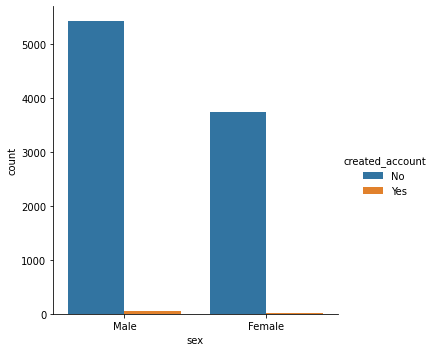

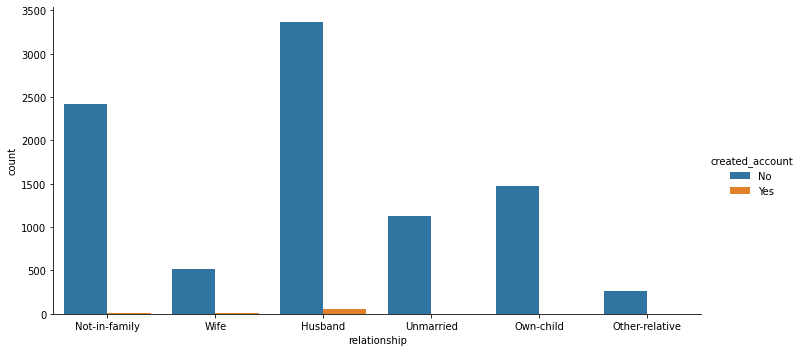

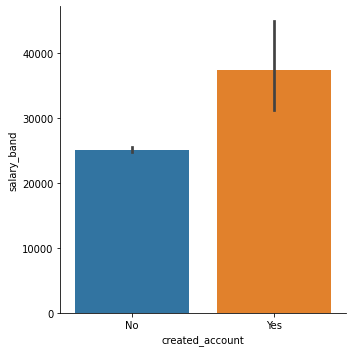

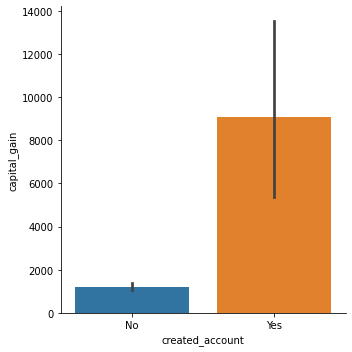

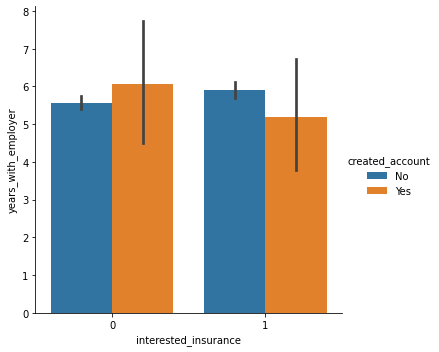

In [17]:
import seaborn as sns
#sns.pairplot(data=data, hue="created_account")

sns.catplot(data=data, hue="created_account", x="sex", kind="count")

sns.catplot(data=data, hue="created_account", x="relationship", kind="count", aspect=2)

sns.catplot(data=data, x="created_account", y="salary_band", kind="bar")

sns.catplot(data=data, x="created_account", y="capital_gain", kind="bar")

sns.catplot(data=data, x="interested_insurance", y="years_with_employer", hue="created_account", kind="bar")

#sns.catplot(data=data, x="relationship", y="capital_gain", hue="created_account", kind="box", aspect=2)





Obvious Patterns in the data
- Data is imbalanced 
- On average if you have a high capital gain and salary you are likely to opted in for the product 
- Men tend to take the insurance product more than women but we have to recognise that there's more data of men than women 

# Build model

## Feature Selection 

#### Delete more irrelevant data points for model before feature selection

In [18]:
# removed because the data point is too specific, has only one value, irrelevant. 
data = data.drop(columns =['full_name', 'new_mortgage', 'postcode', 'company_email', 'months_with_employer'])
data

,town,paye,salary_band,years_with_employer,hours_per_week,capital_gain,capital_loss,sex,religion,relationship,...,age,marital_status,education,job_title,occupation_level,education_num,familiarity_nw,view_nw,interested_insurance,created_account
0,Edinburgh,53791313,18109.0,20.500000,40,2174,0,Male,Christianity,Not-in-family,...,39,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,No
1,Swindon,BR442000,32892.0,3.500000,40,0,0,Female,Christianity,Wife,...,28,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,No
2,Swindon,NW384000,39744.0,4.333333,50,14084,0,Female,Christianity,Not-in-family,...,31,Never-married,Masters,Insurance broker,12,18,6,3,1,Yes
3,South Caroline,72232552,16785.0,0.083333,40,5178,0,Male,Christianity,Husband,...,42,Married-civ-spouse,Bachelors,"Development worker, international aid",4,17,5,3,1,Yes
4,Swindon,38670664,29649.0,3.833333,40,0,0,Male,Christianity,Husband,...,40,Married-civ-spouse,Assoc-voc,Cartographer,10,14,8,5,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Edinburgh,00811729,17700.0,1.416667,30,1055,0,Female,Christianity,Own-child,...,22,Never-married,Bachelors,"Journalist, broadcasting",7,17,3,6,0,No
10320,Edinburgh,29849857,7473.5,2.083333,50,0,0,Male,Christianity,Not-in-family,...,23,Never-married,Bachelors,Adult nurse,8,17,9,5,0,No
10321,Swindon,NW384000,23733.0,13.583333,45,0,0,Male,Christianity,Husband,...,44,Married-civ-spouse,Bachelors,Environmental health practitioner,6,17,3,4,1,No
10322,Swindon,71540788,22185.0,20.583333,38,0,0,Male,Christianity,Husband,...,55,Married-civ-spouse,Some-college,Microbiologist,8,13,7,5,1,No


In [19]:
# seperate categorical and numerical column
data_categorical=data.select_dtypes(include=['object'])
data_numerical=data.select_dtypes(include=['float64', 'int64', 'int32'])


In [20]:
data.reset_index(drop=True, inplace=True)

X = data.loc[:, 'town':'interested_insurance']
y = data.loc[:, 'created_account']


le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

#split training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

data_categorical = X_train.select_dtypes(include=['object'])

enc = preprocessing.OrdinalEncoder()
data_categorical_enc = enc.fit_transform(data_categorical)
data_categorical = pd.DataFrame(data_categorical_enc, columns = data_categorical.columns)
data_numerical = X_train.select_dtypes(include=['float64', 'int64', 'int32'])
data_numerical.reset_index(drop=True, inplace=True)

X_train = pd.concat([data_categorical, data_numerical], axis = 1)

#print(X_train)


selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
selector.scores_.tolist()

# selectorc = SelectKBest(chi2,k=5)
# selectorc.fit(data_catagorical, y_train)
# print(selectorc.scores_.tolist())

sf = selector.get_support(indices=True)
print(sf)

X_train.iloc[:, sf]



[ 0  1  4 11 13 14 15 18 19 21]


,town,paye,relationship,salary_band,hours_per_week,capital_gain,capital_loss,occupation_level,education_num,view_nw
0,100.0,4172.0,3.0,8410.5,44,0,0,10,17,4
1,500.0,4517.0,1.0,81016.0,40,27828,0,16,18,8
2,100.0,2960.0,0.0,19448.0,40,5013,0,6,18,8
3,231.0,426.0,0.0,16887.0,65,0,0,3,12,9
4,100.0,613.0,1.0,28651.0,40,0,0,9,13,9
...,...,...,...,...,...,...,...,...,...,...
6940,100.0,5011.0,1.0,27404.0,30,0,0,8,13,1
6941,566.0,2656.0,5.0,45180.0,35,7298,0,14,14,6
6942,100.0,4260.0,1.0,21632.0,28,0,0,7,21,2
6943,500.0,5604.0,0.0,29778.0,40,0,0,9,10,5


## Handling Categorical Data



In [21]:
target = data.loc[:, 'created_account']
data = data.loc[:, ['town','paye','relationship','salary_band','hours_per_week','capital_gain','capital_loss','occupation_level','education_num','view_nw']]


#print(data.town.nunique())
#print(data.town.value_counts().to_dict())
#print(data.paye.nunique())
#print(data.paye.value_counts().to_dict())
#print(data.relationship.nunique())


top_8_town = [x for x in data.town.value_counts().sort_values(ascending=False).head(8).index]
top_8_paye = [x for x in data.paye.value_counts().sort_values(ascending=False).head(8).index]
all_6_relationship = [x for x in data.relationship.value_counts().sort_values(ascending=False).index]

def one_hot(df, column, top_values):
    for i in top_values:
        df[column+'_'+i] = np.where(df[column]==i, 1, 0)

        
one_hot(data, 'town', top_8_town)
one_hot(data, 'paye', top_8_paye)
one_hot(data, 'relationship', all_6_relationship)

data = data.drop(columns =['town', 'paye', 'relationship'])
data
    

,salary_band,hours_per_week,capital_gain,capital_loss,occupation_level,education_num,view_nw,town_Edinburgh,town_Swindon,town_Leeds,...,paye_80190851,paye_12610186,paye_AC001033,paye_AA001052,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,relationship_Other-relative
0,18109.0,40,2174,0,1,17,9,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,32892.0,40,0,0,12,17,9,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,39744.0,50,14084,0,12,18,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,16785.0,40,5178,0,4,17,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,29649.0,40,0,0,10,14,5,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,17700.0,30,1055,0,7,17,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9256,7473.5,50,0,0,8,17,5,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9257,23733.0,45,0,0,6,17,4,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9258,22185.0,38,0,0,8,13,5,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## Handle numerical data

In [22]:

num_col = ['salary_band','hours_per_week', 'capital_gain', 'capital_loss', 'occupation_level','education_num', 'view_nw']
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])

data

,salary_band,hours_per_week,capital_gain,capital_loss,occupation_level,education_num,view_nw,town_Edinburgh,town_Swindon,town_Leeds,...,paye_80190851,paye_12610186,paye_AC001033,paye_AA001052,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,relationship_Other-relative
0,-0.382153,-0.017616,0.103038,-0.218852,-1.735975,0.990567,1.510187,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.411100,-0.017616,-0.150055,-0.218852,1.073559,0.990567,1.510187,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.778777,0.782421,1.489573,-0.218852,1.073559,1.273499,-0.853296,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.453198,-0.017616,0.452757,-0.218852,-0.969739,0.990567,-0.853296,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.237081,-0.017616,-0.150055,-0.218852,0.562734,0.141772,-0.065468,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,-0.404099,-0.817654,-0.027234,-0.218852,-0.203502,0.990567,0.328446,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9256,-0.952851,0.782421,-0.150055,-0.218852,0.051910,0.990567,-0.065468,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9257,-0.080370,0.382402,-0.150055,-0.218852,-0.458914,0.990567,-0.459382,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9258,-0.163435,-0.177624,-0.150055,-0.218852,0.051910,-0.141160,-0.065468,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## Resampling dataset to deal with Imbalanced data

In [23]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE

print(Counter(target))

#oversample = RandomOverSampler(sampling_strategy='minority')
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(data, target)
print(Counter(y_ros))

Counter({'No': 9181, 'Yes': 79})
Counter({'No': 9181, 'Yes': 9181})


## Split train and test dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42)




## Train model/models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier





lr = LogisticRegression().fit(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('training done')

C:\Users\Olaoluwa.Faseru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training done


## Evaluate model/models

LogisticRegression Accuracy:  0.9134144127790887
LogisticRegression Cross validation  0.9115980753881422
KNN Accuracy:  0.970956616445816
KNN Cross validation  0.9437282100485106

Selected Algorithm

Randomforest Accuracy:  0.9938282809947359
Randomforest Cross validation  0.9833000862999688
F1 score  0.993828254558089
Randomforest roc-auc:  0.9998200274459792
Randomforest confusion matrix 


C:\Users\Olaoluwa.Faseru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


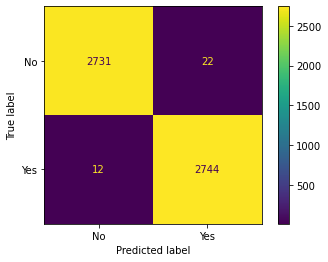

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt




print('LogisticRegression Accuracy: ', accuracy_score(y_test, lr.predict(X_test)))
print('LogisticRegression Cross validation ', np.mean(cross_val_score(lr, X_test, y_test, cv=3)))

print('KNN Accuracy: ', accuracy_score(y_test, knn.predict(X_test)))
print('KNN Cross validation ', np.mean(cross_val_score(knn, X_test, y_test, cv=3)))


print('')
print('Selected Algorithm')
print('')
print('Randomforest Accuracy: ', accuracy_score(y_test, rf.predict(X_test)))
print('Randomforest Cross validation ', np.mean(cross_val_score(rf, X_test, y_test, cv=3)))
print('F1 score ',f1_score(y_test, rf.predict(X_test), average='weighted'))
print('Randomforest roc-auc: ',roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('Randomforest confusion matrix ')
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()
#print(confusion_matrix(y_test, rf.predict(X_test)))





## Selecting Thershold Random forest model

In [27]:

# Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label='Yes')
thresholds


# Get best threshold for best accuracy
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(rf.predict_proba(X_test)[:,1]>thres,'Yes','No')
    accuracy_ls.append(accuracy_score(y_test, y_pred))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
38,0.58,0.994917
37,0.61,0.994917
36,0.63,0.994917
34,0.65,0.994736
39,0.55,0.994554


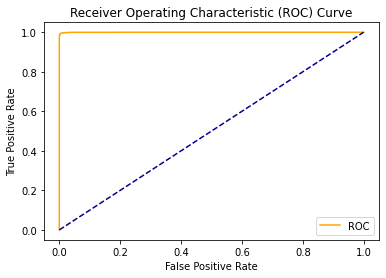

In [28]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
plot_roc_curve(fpr,tpr)

In [29]:
# Use selected threshold 

threshold = 0.58

predicted = np.where(rf.predict_proba(X_test)[:,1]>threshold,'Yes','No')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.9949174078780177


### Ideally do Hyperparameter Tuning - Grid search but Model is at 99.50% already 